In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNet

In [69]:
X = np.linspace(0, 10, 100)

In [70]:
a = 3.14
b = 3
y = a * X + b + 1.5*np.random.randn(100)

In [73]:
outlayer_points = np.random.randint(0, 30, 13)
outlayer_direction = np.where(np.random.randint(-1 , 1 , 13) == 0, 1, 1 )

In [74]:
for i, el in enumerate(outlayer_points):
    y[el] = y[el] + outlayer_direction[i] * 20 + 10 * np.abs(np.random.randn())

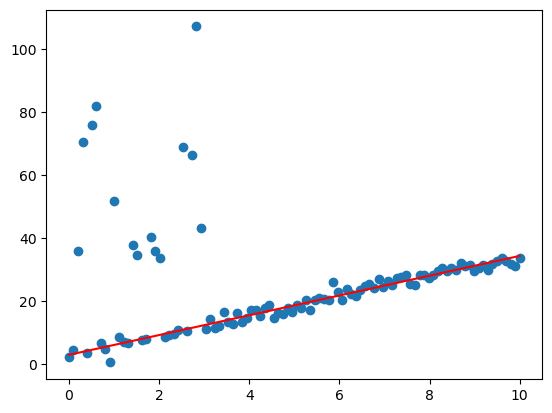

In [75]:
plt.scatter(X,y)
plt.plot(X, a * X + b, color='red')
plt.show()

In [59]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))
def MAE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))
def RMSE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
def SMAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))) * 2

In [60]:
from scipy.optimize import minimize
def loss_func_rmse(params):  
    a, b = params
    y_pred = a * X + b
    return RMSE(y, y_pred)


def loss_func_smape(params):  
    a, b = params
    y_pred = a * X + b
    return SMAPE(y, y_pred)


def loss_func_mape(params):  
    a, b = params
    y_pred = a * X + b
    return MAPE(y, y_pred)


def loss_func_mae(params): 
    a, b = params
    y_pred = a * X + b
    return MAE(y, y_pred)

RMSE: a=0.4387, b=23.1482, Wartość=16.8920
SMAPE: a=3.1664, b=2.6857, Wartość=27.9547
MAPE: a=3.1929, b=2.3214, Wartość=25.4346
MAE: a=2.9700, b=4.2463, Wartość=7.7104


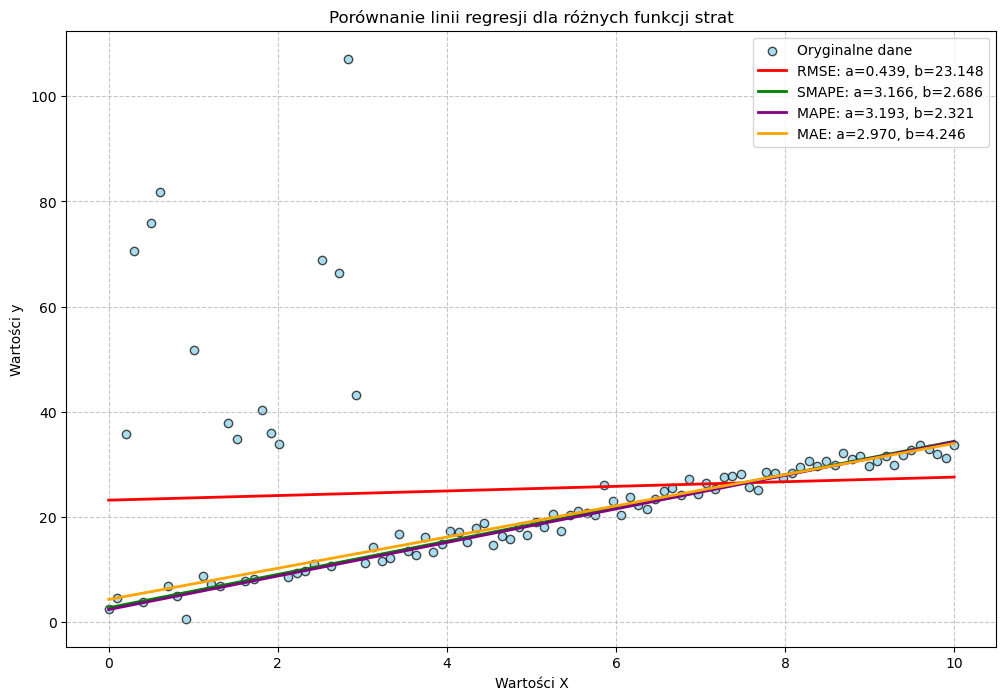

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



def loss_func_rmse_impl(params):
    a, b = params
    y_pred = a * X + b
    return np.sqrt(np.mean((y - y_pred) ** 2))


def loss_func_smape_impl(params):
    a, b = params
    y_pred = a * X + b
    numerator = np.abs(y - y_pred)
    denominator = (np.abs(y) + np.abs(y_pred)) / 2
    denominator_safe = np.where(denominator == 0, 1, denominator)
    smape_values = np.where(denominator == 0, 0, numerator / denominator_safe)
    return np.mean(smape_values) * 100


def loss_func_mape_impl(params):
    a, b = params
    y_pred = a * X + b
    mask = y != 0
    if not np.any(mask):
        return 0.0 if np.all(y_pred == 0) else float("inf")
    return np.mean(np.abs((y[mask] - y_pred[mask]) / y[mask])) * 100


def loss_func_mae_impl(params):
    a, b = params
    y_pred = a * X + b
    return np.mean(np.abs(y - y_pred))


loss_functions_to_optimize = [
    ("RMSE", loss_func_rmse_impl),
    ("SMAPE", loss_func_smape_impl),
    ("MAPE", loss_func_mape_impl),
    ("MAE", loss_func_mae_impl),
]

initial_params = [0.0, 0.0]
optimization_results_summary = {}

plt.figure(figsize=(12, 8))
plt.scatter(
    X,
    y,
    label="Oryginalne dane",
    color="skyblue",
    alpha=0.7,
    edgecolors="black",
    zorder=1,
)


colors = ["red", "green", "purple", "orange"]
color_idx = 0

for metric_name, current_loss_function in loss_functions_to_optimize:
    result = minimize(
        current_loss_function,
        initial_params,
        method="Nelder-Mead",
    )

    if result.success:
        a_opt, b_opt = result.x
        min_loss_value = result.fun
        print(
            f"{metric_name}: a={a_opt:.4f}, b={b_opt:.4f}, Wartość={min_loss_value:.4f}"
        )

        optimization_results_summary[metric_name] = {
            "a": a_opt,
            "b": b_opt,
            "loss_value": min_loss_value,
            "success": True,
            "message": result.message,
        }

        y_line_opt = a_opt * X + b_opt
        plt.plot(
            X,
            y_line_opt,
            label=f"{metric_name}: a={a_opt:.3f}, b={b_opt:.3f}",
            color=colors[color_idx % len(colors)],
            linewidth=2,
            zorder=2,
        )
        color_idx += 1
    else:
        print(f"Optymalizacja dla {metric_name} nie powiodła się: {result.message}")
        optimization_results_summary[metric_name] = {
            "a": None,
            "b": None,
            "loss_value": None,
            "success": False,
            "message": result.message,
        }

plt.title("Porównanie linii regresji dla różnych funkcji strat")
plt.xlabel("Wartości X")
plt.ylabel("Wartości y")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


5/40
10/40
15/40
20/40
25/40
30/40
35/40
40/40
      lambda1  lambda2  loss_value  alpha_sklearn  l1_ratio_sklearn
0    0.000100   0.0001   53.476243       0.000300          0.333333
40   0.000134   0.0001   53.476244       0.000334          0.401806
80   0.000180   0.0001   53.476246       0.000380          0.474337
120  0.000242   0.0001   53.476249       0.000442          0.547968
160  0.000326   0.0001   53.476252       0.000526          0.619556
  lambda1: 1.0000e-04
  lambda2: 1.0000e-04
  alpha: 3.0000e-04
  l1_ratio: 0.3333
  Minimalne RMSE: 53.4762


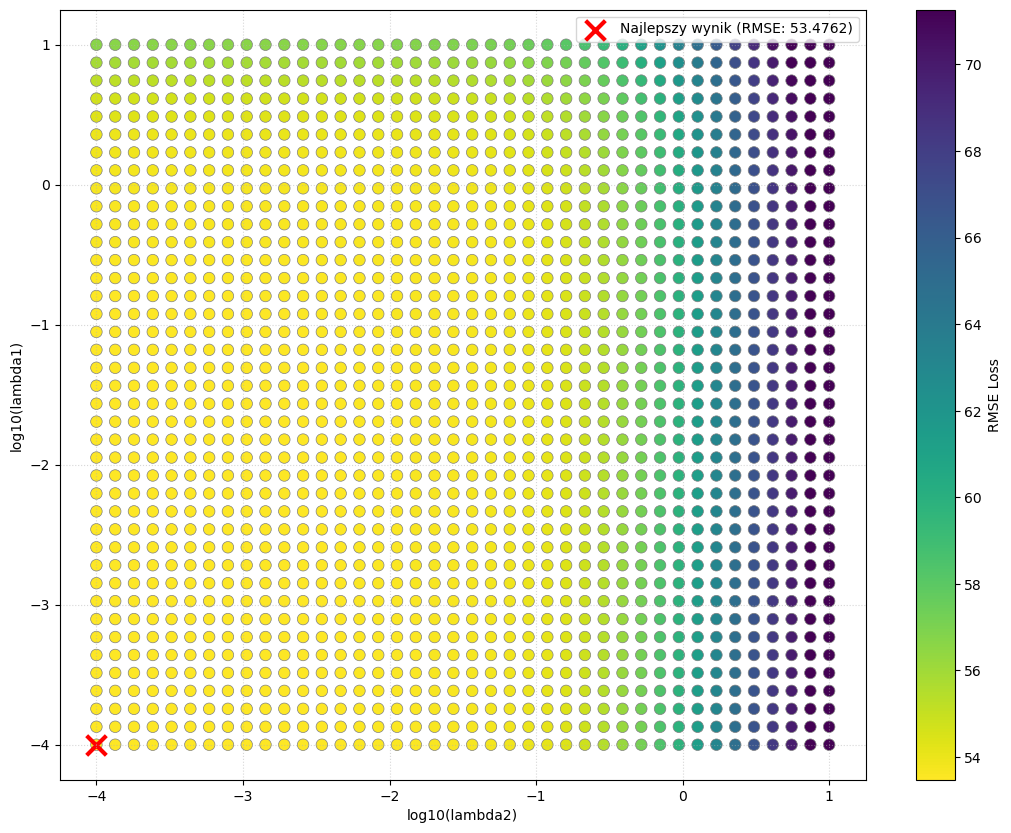

In [92]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as colors

diabetes = load_diabetes()
X_data = diabetes.data
y_data = diabetes.target

X_train_raw = X_data
y_train = y_data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)

lambda1_coef_vals = np.logspace(-4, 1, 40)
lambda2_coef_vals = np.logspace(-4, 1, 40)

results = []

for i, lambda1_c in enumerate(lambda1_coef_vals):
    for j, lambda2_c in enumerate(lambda2_coef_vals):
        current_alpha_sklearn = lambda1_c + 2 * lambda2_c

        if current_alpha_sklearn == 0:
            current_l1_ratio_sklearn = 0.5
        else:
            current_l1_ratio_sklearn = lambda1_c / current_alpha_sklearn

        current_l1_ratio_sklearn = np.clip(current_l1_ratio_sklearn, 0, 1)

        model = ElasticNet(
            alpha=current_alpha_sklearn,
            l1_ratio=current_l1_ratio_sklearn,
            fit_intercept=True,
            max_iter=10000,
            tol=1e-4,
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_train_scaled)
        loss_value = RMSE(y_train, y_pred)

        results.append(
            (
                lambda1_c,
                lambda2_c,
                loss_value,
                current_alpha_sklearn,
                current_l1_ratio_sklearn,
            )
        )
    if (i + 1) % 5 == 0 or (i + 1) == len(lambda1_coef_vals):
        print(f"{i+1}/{len(lambda1_coef_vals)}")


results_df = pd.DataFrame(
    results,
    columns=["lambda1", "lambda2", "loss_value", "alpha_sklearn", "l1_ratio_sklearn"],
)
results_df = results_df.sort_values(by="loss_value")

print(results_df.head())

best_params = results_df.iloc[0]
print(f"  lambda1: {best_params['lambda1']:.4e}")
print(f"  lambda2: {best_params['lambda2']:.4e}")
print(f"  alpha: {best_params['alpha_sklearn']:.4e}")
print(f"  l1_ratio: {best_params['l1_ratio_sklearn']:.4f}")
print(f"  Minimalne RMSE: {best_params['loss_value']:.4f}")


plt.figure(figsize=(13, 10))

finite_results_df = results_df[np.isfinite(results_df["loss_value"])]

if not finite_results_df.empty:
    log_lambda1 = np.log10(finite_results_df["lambda1"])
    log_lambda2 = np.log10(finite_results_df["lambda2"])
    loss_values = finite_results_df["loss_value"]

    min_loss_val = loss_values.min()
    upper_bound_loss = np.percentile(loss_values, 95) 
    if upper_bound_loss <= min_loss_val and len(loss_values) > 1:
        upper_bound_loss = np.percentile(loss_values, 99)
    if (
        upper_bound_loss <= min_loss_val
    ):  
        upper_bound_loss = min_loss_val + 1e-9 if min_loss_val > 0 else 1.0

    scatter = plt.scatter(
        log_lambda2,
        log_lambda1,
        c=loss_values,
        cmap="viridis_r",
        s=69,  
        vmin=min_loss_val,
        vmax=upper_bound_loss, 
        edgecolors="grey",  
        linewidths=0.5,
    )

    plt.colorbar(scatter, label="RMSE Loss")

    if (
        best_params["lambda1"] > 0
        and best_params["lambda2"] > 0
        and not pd.isna(best_params["loss_value"])
        and np.isfinite(best_params["loss_value"])
    ):
        plt.scatter(
            np.log10(best_params["lambda2"]),
            np.log10(best_params["lambda1"]),
            marker="x",
            color="red",
            s=200,
            linewidth=3,
            label=f'Najlepszy wynik (RMSE: {best_params["loss_value"]:.4f})',
        )
    plt.legend()

else:
    print("Nie znaleziono żadnych prawidłowych wyników do wyświetlenia na wykresie.")


plt.xlabel("log10(lambda2)")
plt.ylabel("log10(lambda1)")
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()
